# Data Mining - project part 1


In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(10,10)}) # settings for seaborn plot sizes

In [3]:
df = pd.read_csv(r"./marketing_campaigns_train.csv", index_col=0)

## show data information :

In [4]:
print("Shape: ", df.shape)
df.head()

Shape:  (30517, 20)


,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,positive,campaign_type,consent,n_contact,l_date,l_call_duration,p_outcome,n_p_contact,p_days,subscribed
id,,,,,,,,,,,,,,,,,,,,
512491,married,32,unknown,doctoral,student,cellular,300,False,True,False,True,phone call,False,2,04-Feb,175,failure,1,272,False
495633,married,45,1,master,scientist,cellular,1339,False,True,False,True,phone call,False,1,08-Jul,322,unknown,0,-1,False
507946,married,54,2,master,technician,telephone,2832,False,True,False,True,phone call,False,1,19-Nov,67,unknown,0,-1,False
491165,married,30,unknown,master,engineer,unknown,530,True,True,False,True,phone call,False,1,04-Jun,45,unknown,0,-1,False
494627,married,40,unknown,doctoral,manager,unknown,-922,True,True,True,False,phone call,False,2,23-Jun,39,unknown,0,-1,False


what types the columns are : 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30517 entries, 512491 to 516748
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           30517 non-null  object
 1   age              30517 non-null  int64 
 2   n_child          30517 non-null  object
 3   education        30517 non-null  object
 4   profession       30517 non-null  object
 5   device           30517 non-null  object
 6   account_balance  30517 non-null  int64 
 7   loan             30517 non-null  bool  
 8   mortgage         30517 non-null  bool  
 9   credit           30517 non-null  bool  
 10  positive         30517 non-null  bool  
 11  campaign_type    30517 non-null  object
 12  consent          30517 non-null  bool  
 13  n_contact        30517 non-null  int64 
 14  l_date           30517 non-null  object
 15  l_call_duration  30517 non-null  int64 
 16  p_outcome        30517 non-null  object
 17  n_p_contact      30517 no

In [6]:
target = pd.DataFrame(df['subscribed']) 
data = df.drop('subscribed', axis=1)

devide the columns by data types 

In [7]:
num_col = data.describe().columns # to get the numeric column
nom_col = data.describe(include=object).columns # to get the nominal column
boo_col = data.describe(include=bool).columns # to get the boolean column

the data by types :

In [8]:
num_data = data[num_col]
nom_data = data[nom_col]
boo_data = data[boo_col]

In [9]:
num_data.describe() 

,age,account_balance,n_contact,l_call_duration,n_p_contact,p_days
count,30517.000000,30517.000000,30517.000000,30517.000000,30517.00000,30517.000000
mean,40.873546,1228.707966,2.769604,233.294262,0.58397,40.320706
std,10.591058,2738.410757,3.085730,232.690931,2.48213,100.489272
min,18.000000,-7207.000000,1.000000,2.000000,0.00000,-1.000000
25%,33.000000,74.000000,1.000000,95.000000,0.00000,-1.000000
50%,39.000000,411.000000,2.000000,164.000000,0.00000,-1.000000
75%,48.000000,1278.000000,3.000000,286.000000,0.00000,-1.000000
max,95.000000,91924.000000,63.000000,4428.000000,275.00000,871.000000


In [10]:
df["age"].median()

39.0

* For age category we see that the mean is : 40.32 and the median is 39.0 so there is 50% chance the person we contact is less than 39. We see also that 75% of the people we conntacted were less than 48.

* From l_call_duration - last contact duration we understand that most calls(75%) last less than 286 sec , less than 5 min.

* From n_contacts we unnderstand that most of the people we conntact 3 times or less 

In [11]:
describe_df = nom_data.describe()
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/30517, decimals=3))
describe_df

,status,n_child,education,profession,device,campaign_type,l_date,p_outcome
count,30517,30517,30517,30517,30517,30517,30517,30517
unique,3,5,4,12,3,1,308,4
top,married,unknown,master,engineer,cellular,phone call,15-May,unknown
freq,18414,19820,15622,6538,19718,30517,782,24943
%freq,0.603,0.649,0.512,0.214,0.646,1,0.026,0.817


In [12]:
bool_df = boo_data.describe()
bool_df.loc['%freq'] = bool_df.apply(lambda x: np.round(x.loc['freq']/30517, decimals=3))
bool_df

,loan,mortgage,credit,positive,consent
count,30517,30517,30517,30517,30517
unique,2,2,2,2,2
top,False,True,False,True,False
freq,25632,17055,29987,28059,26997
%freq,0.84,0.559,0.983,0.919,0.885


* campaingn_type : all the values are the same so no data added in this column

<AxesSubplot:xlabel='subscribed', ylabel='age'>

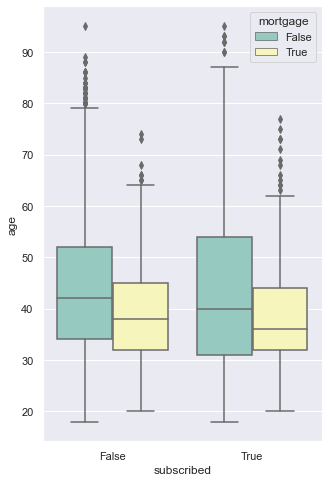

In [13]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="age", x="subscribed", hue= "mortgage", data=df, palette="Set3")

* from this boxplot we understand that if someone has a mortgage and also subscribed usually he's younger

### skew : 

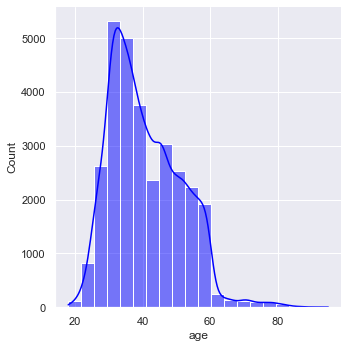

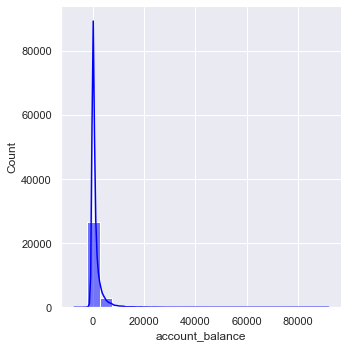

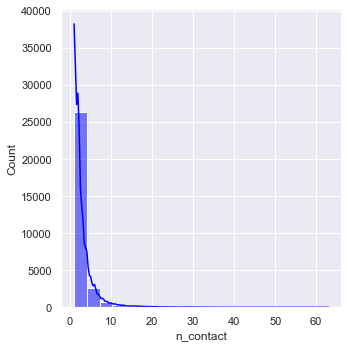

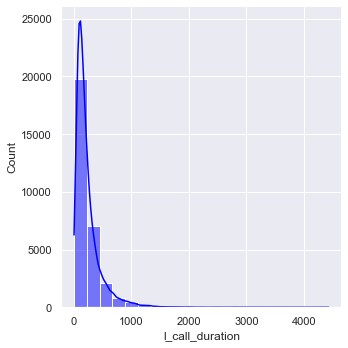

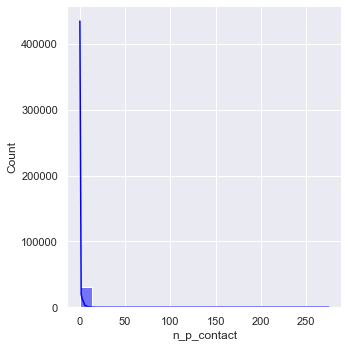

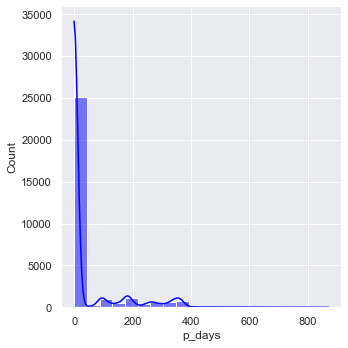

In [14]:
for col in num_col:
    sns.displot(num_data[col], bins=20, kde=True, color='blue')

In [15]:
num_data['age'].skew(axis = 0, skipna = True) 

0.6962760241958142

In [16]:
num_data['n_contact'].skew(axis = 0, skipna = True) 

4.791966663755302

In [17]:
num_data['account_balance'].skew(axis = 0, skipna = True) 

8.348069094854177

* We see that only in column "age" we get a good distribution

<AxesSubplot:xlabel='consent', ylabel='age'>

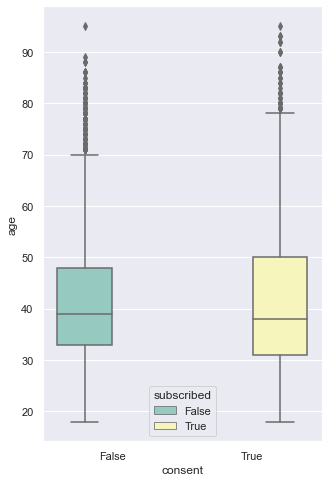

In [18]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="age", x="consent", hue= "subscribed", data=df, palette="Set3")

* From here we understand that who gave consent to the offer also subscribed so we understand that when someone agrees to  the offer they will definitely subscribe.<br>
* we'll see full correlation between them.

In [19]:
df['credit'][df['positive']==False].describe()

count      2458
unique        2
top       False
freq       2195
Name: credit, dtype: object

In [20]:
df['credit'][df['positive']==True].describe()


count     28059
unique        2
top       False
freq      27792
Name: credit, dtype: object

In [21]:
df['positive'].describe()

count     30517
unique        2
top        True
freq      28059
Name: positive, dtype: object

In [22]:
df['credit'].describe()

count     30517
unique        2
top       False
freq      29987
Name: credit, dtype: object

## missing values:

### Education

In [23]:
df['education'].value_counts()

master      15622
doctoral     9061
bachelor     4590
unknown      1244
Name: education, dtype: int64

* 4%  only of education is unknown, we need to decide in which way we treat the missing data <br>

In [24]:
unknown_ed_df = df.loc[df['education']=='unknown']
unknown_ed_df.value_counts(df['profession'])

profession
engineer         314
manager          166
scientist        163
technician       113
unemployed       112
teacher           97
unknown           89
accountant        80
retired           46
architect         25
student           24
self-employed     15
dtype: int64

* people we don't have information about their education and proffession are only 89 , thats 0.3%  

#### replacing the unknown:

* first we replace the names of the education to numbers and where it was 'unknown' we fill with nan

In [25]:
df["education1"]=df["education"]

In [26]:
df["education1"] = df["education1"].replace(to_replace="bachelor",value= int(1))
df["education1"] = df["education1"].replace(to_replace="master", value=int(2))
df["education1"] = df["education1"].replace(to_replace="doctoral", value=int(3))
df["education1"] = df["education1"].replace(to_replace="unknown",value= np.nan)

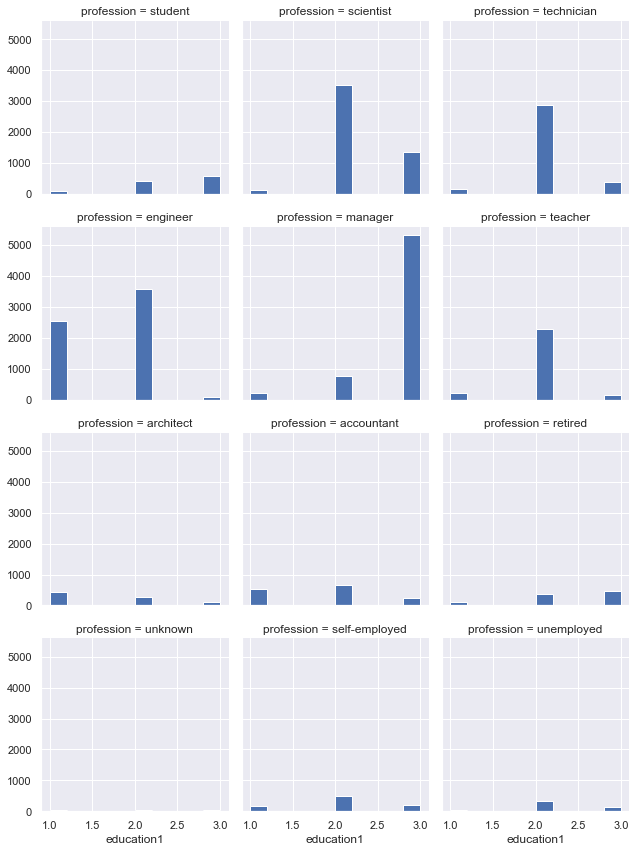

In [27]:
g = sns.FacetGrid(df, col = 'profession',col_wrap=3)
g.map(plt.hist,'education1')

In [28]:
for i in df['profession'].unique():
    df.loc[df['profession']==i , 'education1'] = df['education1'][df['profession']==i].fillna(value=df['education1'][df['profession']==i].median())
    print("For class ", i, " the median is ", df.loc[df['profession']==i , 'education1'].median())

For class  student  the median is  3.0
For class  scientist  the median is  2.0
For class  technician  the median is  2.0
For class  engineer  the median is  2.0
For class  manager  the median is  3.0
For class  teacher  the median is  2.0
For class  architect  the median is  1.0
For class  accountant  the median is  2.0
For class  retired  the median is  2.0
For class  unknown  the median is  2.0
For class  self-employed  the median is  2.0
For class  unemployed  the median is  2.0


In [29]:
df['education1'].value_counts()

2.0    16651
3.0     9251
1.0     4615
Name: education1, dtype: int64

* we filled the missing values for unknown educations with the median of education for every profession.<br>
    because there is a storng connection between what profession holds a person to his education.

### Profession

* we'll find the education of the unknown profession and fill them the common profession for this education level. 

In [30]:
df['profession'].value_counts()

engineer         6538
manager          6458
scientist        5138
technician       3503
teacher          2759
accountant       1491
student          1096
retired           988
self-employed     882
architect         833
unemployed        638
unknown           193
Name: profession, dtype: int64

In [31]:
df['profession1'] = df['profession']

In [32]:
df['profession1'] =df['profession1'].replace("unknown",np.nan)

* we'll find the most common profession for every level of education:


In [33]:
df['profession1'][df['education1']==1].describe()

count         4585
unique          11
top       engineer
freq          2537
Name: profession1, dtype: object

In [34]:
df['profession1'][df['education1']==2].describe()

count        16517
unique          11
top       engineer
freq          3905
Name: profession1, dtype: object

In [35]:
df['profession1'][df['education1']==3].describe()

count        9222
unique         11
top       manager
freq         5493
Name: profession1, dtype: object

In [36]:
df.loc[df['education1']==1 , 'profession1'] = df['profession1'][df['education1']==1].fillna(value="engineer")
df.loc[df['education1']==2 , 'profession1'] = df['profession1'][df['education1']==2].fillna(value="engineer")
df.loc[df['education1']==3 , 'profession1'] = df['profession1'][df['education1']==3].fillna(value="manager")

In [37]:
df['profession1'].value_counts()

engineer         6702
manager          6487
scientist        5138
technician       3503
teacher          2759
accountant       1491
student          1096
retired           988
self-employed     882
architect         833
unemployed        638
Name: profession1, dtype: int64

### device - communication type

In [38]:
df['device'].value_counts()

cellular     19718
unknown       8871
telephone     1928
Name: device, dtype: int64

* 30% of the device rows is unknown <br>
    we'll find the best replacement for the unknown values<br>

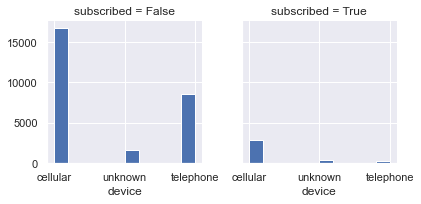

In [39]:
g = sns.FacetGrid(df, col = 'subscribed')
g.map(plt.hist,'device')

 * we can understand from that that the influence of "unknown" device on the subscribtion is not high so we'll replace the "unknown" with the common "cellular" 

In [40]:
df["device1"] = df["device"].replace('unknown', 'cellular')

* we'll define device as :  cellular = 1 telephone = 0 

In [41]:
df["device1"] = df["device1"].replace(["cellular","telephone"],[1,0])

### p_outcome -  the outcome of the previous campaigns

In [42]:
df['p_outcome'].value_counts()

unknown    24943
failure     3330
other       1227
success     1017
Name: p_outcome, dtype: int64

* we decided to combine the "other" to unknown, most common is unknown and also for our case we look for result of success or <br>
    failure so "other" in our case means the same as unknown.

In [43]:
df["p_outcome"] = df["p_outcome"].replace('other', 'unknown')

In [44]:
df["p_outcome"] = df["p_outcome"].replace('unknown', -1)
df["p_outcome"] = df["p_outcome"].replace('failure', 0)
df["p_outcome"] = df["p_outcome"].replace('success', 1)

In [45]:
df['p_outcome'].value_counts()

-1    26170
 0     3330
 1     1017
Name: p_outcome, dtype: int64

### p_days - number of days since the last contact in a previous campaigns

In [46]:
df['p_days'].value_counts()

-1      24940
 92       108
 182      104
 91        86
 183       77
        ...  
 535        1
 407        1
 39         1
 838        1
 32         1
Name: p_days, Length: 510, dtype: int64

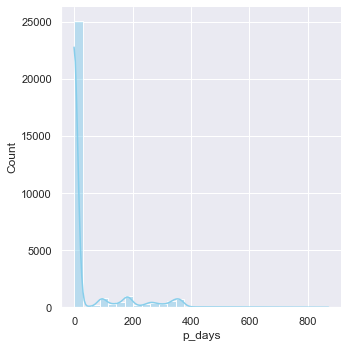

In [47]:
sns.displot(df['p_days'], bins=30, kde=True, color='skyblue')

 * we see that 81% wasn't connected in previous campaings <br>
     and there are 510 different values for p_days, most of is higher than 100 days<br>
     we decided to create new column "conntacted before " <br>
     0 - never conntacted , 1 - contacted before any number of days<br>

In [48]:
df["conntacted_before"] = df["p_days"].replace(-1, 0)
df["conntacted_before"] = df["conntacted_before"].apply(lambda x: 1 if x >= 1  else  0)

In [49]:
df['conntacted_before'].value_counts()

0    24940
1     5577
Name: conntacted_before, dtype: int64

#### conntacted_before and n_p_contact :

In [50]:
df['n_p_contact'].value_counts()

0      24940
1       1881
2       1393
3        788
4        493
5        309
6        194
7        130
8         83
9         69
11        45
10        39
12        28
13        22
15        13
14        12
17        12
16         9
19         8
20         7
23         7
27         5
18         4
25         4
21         3
24         3
29         3
22         2
28         2
38         1
55         1
30         1
51         1
41         1
275        1
58         1
26         1
40         1
Name: n_p_contact, dtype: int64

* we see there is no inconsistents between connected before and n-p-contact as we hoped for

### conntacted before and p_outcome

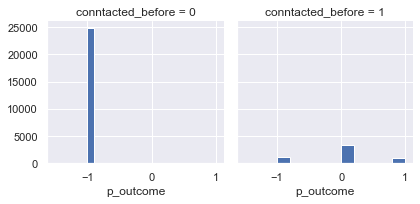

In [51]:
g = sns.FacetGrid(df, col='conntacted_before')
g.map(plt.hist, 'p_outcome')

### n_child -

In [52]:
df['n_child'].value_counts()

unknown      19820
1             3058
3 or more     3048
0             3039
2             1552
Name: n_child, dtype: int64

* n-child has mostly unknown (65%) value so it'll be problematic to fill that big gap
* we'll change the values to numeric values , for 3 and more we placed 3 

In [53]:
df['n_child1'] = df['n_child']

In [54]:
df['n_child1'] = df['n_child1'].replace('unknown' , -1)
df['n_child1'] = df['n_child1'].replace('0',0.0)
df['n_child1'] = df['n_child1'].replace('1',1.0)
df['n_child1'] = df['n_child1'].replace('2',2.0)
df['n_child1'] = df['n_child1'].replace('3 or more',3.0)

In [55]:
df['n_child1'].value_counts()

-1.0    19820
 1.0     3058
 3.0     3048
 0.0     3039
 2.0     1552
Name: n_child1, dtype: int64

<AxesSubplot:>

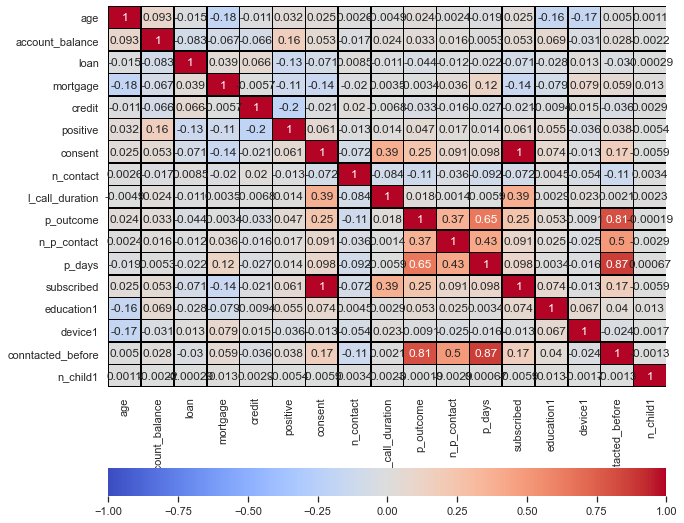

In [56]:
sns.set(rc={'figure.figsize':(10,10)}) # settings for seaborn plot sizes
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.5, linecolor='black', cbar_kws= {'orientation': 'horizontal'})

### Discretization:
#### we we'll do it on l_call_duration :very long call, long call,  very short call, short call and averege call

## Data transformation :

In [57]:
A = df["l_call_duration"].min()
B = df["l_call_duration"].max()
N = 5
W = np.round((B - A)/N)
W

885.0

In [58]:
df.loc[ df['l_call_duration'] <= W, 'call_bin'] = 0
df.loc[(df['l_call_duration'] > W) & (df['l_call_duration'] <= 2*W), 'call_bin'] = 1
df.loc[(df['l_call_duration'] > 2*W) & (df['l_call_duration'] <= 3*W), 'call_bin'] = 2
df.loc[(df['l_call_duration'] > 3*W) & (df['l_call_duration'] <= 4*W), 'call_bin'] = 3
df.loc[ df['l_call_duration'] > 4*W, 'call_bin'] = 4

In [59]:
df['call_bin'].value_counts()

0.0    29761
1.0      703
2.0       40
3.0       12
4.0        1
Name: call_bin, dtype: int64

* we got a not so good of a result because the max made W bigger than what we wanted, so the 0 bin is fuller than the others. 
    we'll switch B-A to the median*2 of call duartion for better results 

In [60]:
C = df["l_call_duration"].median()
N = 5
W = np.round((C*2)/N)
W

66.0

In [61]:
df.loc[ df['l_call_duration'] <= W, 'call_bin'] = 0
df.loc[(df['l_call_duration'] > W) & (df['l_call_duration'] <= 2*W), 'call_bin'] = 1
df.loc[(df['l_call_duration'] > 2*W) & (df['l_call_duration'] <= 3*W), 'call_bin'] = 2
df.loc[(df['l_call_duration'] > 3*W) & (df['l_call_duration'] <= 4*W), 'call_bin'] = 3
df.loc[ df['l_call_duration'] > 4*W, 'call_bin'] = 4

In [62]:
df['call_bin'].value_counts()

4.0    8543
1.0    7786
2.0    6075
0.0    4257
3.0    3856
Name: call_bin, dtype: int64

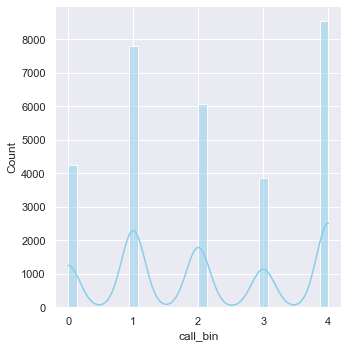

In [63]:
sns.displot(df['call_bin'], bins=30, kde=True, color='skyblue')

### Normalization

* age  and account balance in Z-score normalization : Change the data to be with 0 mean and variance 1 

id 
512491   -0.837848
495633    0.389623
507946    1.239411
491165   -1.026689
494627   -0.082481
Name: age_norm, dtype: float64


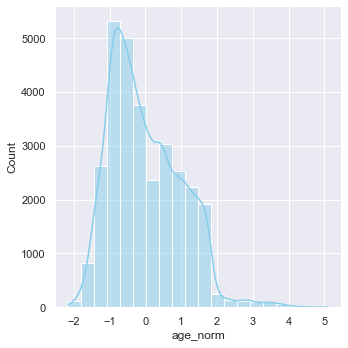

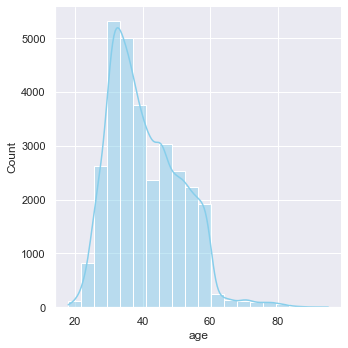

In [64]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['age']))
df['age_norm'] = z_scaler.transform(pd.DataFrame(df['age']))
print(df['age_norm'].head())
sns.displot(df['age_norm'], bins=20, kde=True, color='skyblue')
sns.displot(df['age'], bins=20, kde=True, color='skyblue')

id 
512491   -0.339147
495633    0.040277
507946    0.585492
491165   -0.255155
494627   -0.785398
Name: account_norm, dtype: float64


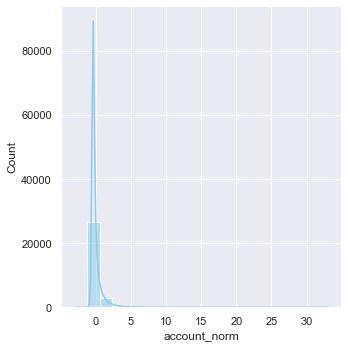

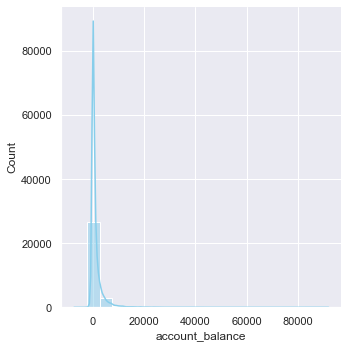

In [65]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['account_balance']))
df['account_norm'] = z_scaler.transform(pd.DataFrame(df['account_balance']))
print(df['account_norm'].head())
sns.displot(df['account_norm'], bins=20, kde=True, color='skyblue')
sns.displot(df['account_balance'], bins=20, kde=True, color='skyblue')

## Data reduction : 

* we changed the bool types to 1 and 0 

In [66]:
df['subscribed1']=df['subscribed'].replace([True,False],[1,0])
df['loan1']=df['loan'].replace([True,False],[1,0])
df['mortgage1']=df['mortgage'].replace([True,False],[1,0])
df['credit1']=df['credit'].replace([True,False],[1,0])

* change status to numeric value : 1 - single , 2 - married , 3 - divorced 

In [67]:
df['status'] = df['status'].replace(["single","married","divorced"],[1,2,3])

In [68]:
df1 = df[['subscribed1','loan1','mortgage1','credit1','call_bin','age_norm','account_norm','age','account_balance','n_contact','l_call_duration','p_outcome','n_p_contact','conntacted_before','p_days','education1','device1','status']]
df1.head()

,subscribed1,loan1,mortgage1,credit1,call_bin,age_norm,account_norm,age,account_balance,n_contact,l_call_duration,p_outcome,n_p_contact,conntacted_before,p_days,education1,device1,status
id,,,,,,,,,,,,,,,,,,
512491,0,0,1,0,2.0,-0.837848,-0.339147,32,300,2,175,0,1,1,272,3.0,1,2
495633,0,0,1,0,4.0,0.389623,0.040277,45,1339,1,322,-1,0,0,-1,2.0,1,2
507946,0,0,1,0,1.0,1.239411,0.585492,54,2832,1,67,-1,0,0,-1,2.0,0,2
491165,0,1,1,0,0.0,-1.026689,-0.255155,30,530,1,45,-1,0,0,-1,2.0,1,2
494627,0,1,1,1,0.0,-0.082481,-0.785398,40,-922,2,39,-1,0,0,-1,3.0,1,2


In [69]:
df1.shape

(30517, 18)

In [70]:
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df1, y='subscribed1')
df2 = pca.transform(df1)

In [71]:
df2 = pd.DataFrame(pca.transform(df1))
df2.head()

,0,1,2
0,-928.784619,-57.111224,231.692184
1,110.468554,88.616875,-41.067340
2,1602.941802,-169.477987,-42.197769
3,-699.107403,-186.720302,-41.757034
4,-2151.113060,-189.726093,-41.509656


* the PCA reduced the demantion from 16 to 3 

In [72]:
df['campaign_type'].value_counts()

phone call    30517
Name: campaign_type, dtype: int64

* campaingn_type : all the values are the same so no data added in this column

In [73]:
df = df.drop(['campaign_type'],axis=1)

In [74]:
df["account_balance1"] = df["account_balance"].apply(lambda x: 1 if x >= 1  else  0)

In [75]:
df['account_balance1'].value_counts()

1    28059
0     2458
Name: account_balance1, dtype: int64

In [76]:
df = df.drop(['account_balance1'],axis=1)

In [77]:
df['positive'].value_counts()

True     28059
False     2458
Name: positive, dtype: int64

* we see a strong connection between positive and account balance <br>
  account balance is the averege yearly and the positive is if the account has positive balance right now, we see that someone who had good balance in yearly averege also has positive account balance right now. 
  
* we can maybe reduce the "positive" column because the information is already appears in "account balance"  

In [78]:
df = df.drop(['positive'],axis=1)

* we can drop the consent because it has the same values as subscribe 

In [79]:
df = df.drop(['consent'],axis=1)

* we'll drop all the bool values we changed to 0 and 1 and education, n_child,p_days,device,l_call_duration we changed 

In [80]:
df = df.drop(['loan'],axis=1)
df = df.drop(['mortgage'],axis=1)
df = df.drop(['credit'],axis=1)
df = df.drop(['subscribed'],axis=1)
df = df.drop(['education'],axis=1)
df = df.drop(['n_child'],axis=1)
df = df.drop(['p_days'],axis=1)
df = df.drop(['l_call_duration'],axis=1)
df = df.drop(['device'],axis=1)

In [81]:
df.head()

,status,age,profession,account_balance,n_contact,l_date,p_outcome,n_p_contact,education1,profession1,device1,conntacted_before,n_child1,call_bin,age_norm,account_norm,subscribed1,loan1,mortgage1,credit1
id,,,,,,,,,,,,,,,,,,,,
512491,2,32,student,300,2,04-Feb,0,1,3.0,student,1,1,-1.0,2.0,-0.837848,-0.339147,0,0,1,0
495633,2,45,scientist,1339,1,08-Jul,-1,0,2.0,scientist,1,0,1.0,4.0,0.389623,0.040277,0,0,1,0
507946,2,54,technician,2832,1,19-Nov,-1,0,2.0,technician,0,0,2.0,1.0,1.239411,0.585492,0,0,1,0
491165,2,30,engineer,530,1,04-Jun,-1,0,2.0,engineer,1,0,-1.0,0.0,-1.026689,-0.255155,0,1,1,0
494627,2,40,manager,-922,2,23-Jun,-1,0,3.0,manager,1,0,-1.0,0.0,-0.082481,-0.785398,0,1,1,1


### PART - 2 
starts here

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30517 entries, 512491 to 516748
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             30517 non-null  int64  
 1   age                30517 non-null  int64  
 2   profession         30517 non-null  object 
 3   account_balance    30517 non-null  int64  
 4   n_contact          30517 non-null  int64  
 5   l_date             30517 non-null  object 
 6   p_outcome          30517 non-null  int64  
 7   n_p_contact        30517 non-null  int64  
 8   education1         30517 non-null  float64
 9   profession1        30517 non-null  object 
 10  device1            30517 non-null  int64  
 11  conntacted_before  30517 non-null  int64  
 12  n_child1           30517 non-null  float64
 13  call_bin           30517 non-null  float64
 14  age_norm           30517 non-null  float64
 15  account_norm       30517 non-null  float64
 16  subscribed1     

In [83]:
df = df.drop(['profession','account_balance','l_date','age'],axis=1)

dropping data from :
* proffession that we have in proffesion1 
* age we normalaized so we'll use that 
* account balance with the same reason
* l_data is not usefull because it doesnt include year 

We still have one category type that remines object : profession1 <br>
Let's make it nominal for the cross-validation process

In [84]:
df['profession1'].value_counts()

engineer         6702
manager          6487
scientist        5138
technician       3503
teacher          2759
accountant       1491
student          1096
retired           988
self-employed     882
architect         833
unemployed        638
Name: profession1, dtype: int64

In [85]:
df['profession1']=df['profession1'].replace(['engineer','manager','scientist','technician','teacher','accountant','student','retired','self-employed','architect','unemployed'],[10,9,8,7,6,5,4,3,2,1,0])

In [86]:
df['profession1'].value_counts()

10    6702
9     6487
8     5138
7     3503
6     2759
5     1491
4     1096
3      988
2      882
1      833
0      638
Name: profession1, dtype: int64

dropping the id column because it's an individual number that doesn't give us information that could help us predict if the person will do insurance  

In [87]:
df = df.reset_index(drop=True)

In [88]:
df.head()

,status,n_contact,p_outcome,n_p_contact,education1,profession1,device1,conntacted_before,n_child1,call_bin,age_norm,account_norm,subscribed1,loan1,mortgage1,credit1
0,2,2,0,1,3.0,4,1,1,-1.0,2.0,-0.837848,-0.339147,0,0,1,0
1,2,1,-1,0,2.0,8,1,0,1.0,4.0,0.389623,0.040277,0,0,1,0
2,2,1,-1,0,2.0,7,0,0,2.0,1.0,1.239411,0.585492,0,0,1,0
3,2,1,-1,0,2.0,10,1,0,-1.0,0.0,-1.026689,-0.255155,0,1,1,0
4,2,2,-1,0,3.0,9,1,0,-1.0,0.0,-0.082481,-0.785398,0,1,1,1


In [89]:
df.to_csv('marketing_campaigns_train_after_PRE.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30517 entries, 0 to 30516
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             30517 non-null  int64  
 1   n_contact          30517 non-null  int64  
 2   p_outcome          30517 non-null  int64  
 3   n_p_contact        30517 non-null  int64  
 4   education1         30517 non-null  float64
 5   profession1        30517 non-null  int64  
 6   device1            30517 non-null  int64  
 7   conntacted_before  30517 non-null  int64  
 8   n_child1           30517 non-null  float64
 9   call_bin           30517 non-null  float64
 10  age_norm           30517 non-null  float64
 11  account_norm       30517 non-null  float64
 12  subscribed1        30517 non-null  int64  
 13  loan1              30517 non-null  int64  
 14  mortgage1          30517 non-null  int64  
 15  credit1            30517 non-null  int64  
dtypes: float64(5), int64(1